# CIFAR10- Classification Using CNN

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import keras 
import tensorflow as tf

from tensorflow import keras 
from keras.models import Sequential 
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout 
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.models import Model 
from tensorflow.keras import regularizers, optimizers 
from tensorflow.keras.utils import to_categorical 
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.version) 
print("Keras version:",keras.version)

2024-03-01 14:22:18.005376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 14:22:18.005565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 14:22:18.175905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version: <module 'tensorflow._api.v2.version' from '/opt/conda/lib/python3.10/site-packages/tensorflow/_api/v2/version/__init__.py'>
Keras version: <function version at 0x7cfe934860e0>


In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalizing
X_train = X_train/255
X_test = X_test/255
# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

In [4]:
model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 5,verbose=1,validation_data=(X_test,Y_test_en))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,162 (1.84 MB)

 Trainable params: 481,162 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 56ms/step - accuracy: 0.3615 - loss: 1.7361 - val_accuracy: 0.5023 - val_loss: 1.3757
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.5468 - loss: 1.2749 - val_accuracy: 0.5945 - val_loss: 1.1573
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5966 - loss: 1.1430 - val_accuracy: 0.6317 - val_loss: 1.0722
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - accuracy: 0.6323 - loss: 1.0399 - val_accuracy: 0.6525 - val_loss: 1.0002
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.6680 - loss: 0.9501 - val_accuracy: 0.6528 - val_loss: 0.9847


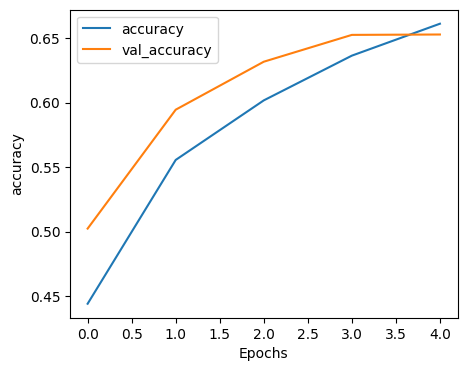

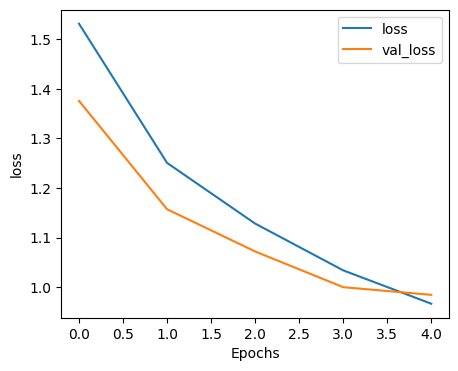

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric])
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()
    
plt.figure(figsize=(5,4))
plot_graphs(history, 'accuracy')
plt.figure(figsize=(5,4))
plot_graphs(history, 'loss')

In [12]:
test_loss,test_acc = model.evaluate(X_test,Y_test_en)
print("% Testing Accuracy : ", test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6565 - loss: 0.9769
% Testing Accuracy :  65.28000235557556
